In [1]:
import dask.dataframe as dd

In [4]:
fn = '/projects/CARDIPS/pipeline/Hi-C/7_indv_HiC/contact_matrices/merged/normalized/iPSC/iPSC.10Kb.nor.chr1.mat'

In [11]:
dd.read_csv?

In [12]:
df = dd.read_csv(fn, sep='\t', header=None)

AttributeError: 'int' object has no attribute 'strip'

In [ ]:
df.loc[100, 200]

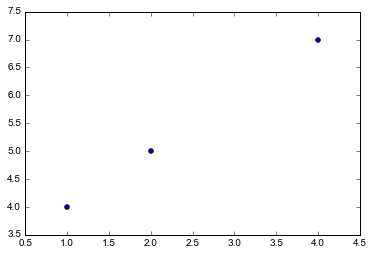

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial']
plt.scatter([1,2,4], [4,5,7])

In [ ]:
plt.savefig

In [2]:
plt.rcParams['font.sans-serif'] = ['Arial']
plt.scatter([1,2,4], [4,5,7])

In [3]:
plt.rcParams['font.sans-serif']

[u'Arial']

/frazer01/home/cdeboever/software/anaconda/envs/cie/lib/python2.7/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


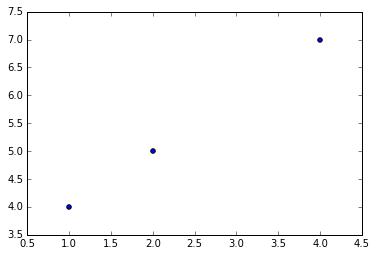

In [5]:
plt.scatter([1,2,4], [4,5,7])

In [10]:
import os
import re
import urllib2

import pandas as pd
import pybedtools as pbt

fn = os.path.join('/publicdata/roadmap_15_state_20151104/EIDlegend.txt')
roadmap_ids = pd.read_table(fn, squeeze=True, index_col=0, header=None)

url = ('http://egg2.wustl.edu/roadmap/data/byFileType'
'/peaks/consolidated/narrowPeak/')
website = urllib2.urlopen(url)
html = website.read()
files = re.findall('href="(.*\.gz)"', html)
lines = [x for x in roadmap_ids.index if 'iPS' in roadmap_ids[x]]
files = [x for x in files if x.split('-')[0] in lines]
files = [x for x in files if 'hotspot' not in x]
urls = ['http://egg2.wustl.edu/roadmap/data/byFileType/peaks/consolidated/narrowPeak/{}'.format(n)
        for n in files]

def read_gzipped_text_url(url):
    """Read a gzipped text file from a URL and return 
    contents as a string."""
    import urllib2
    import zlib
    from StringIO import StringIO

    opener = urllib2.build_opener() 
    request = urllib2.Request(url)
    request.add_header('Accept-encoding', 'gzip')
    respond = opener.open(request)
    compressedData = respond.read()
    respond.close()
    opener.close()
    compressedDataBuf = StringIO(compressedData)
    d = zlib.decompressobj(16+zlib.MAX_WBITS)
    buffer = compressedDataBuf.read(1024)
    #saveFile = open('/tmp/test.txt', "wb")
    s = []
    while buffer:
        s.append(d.decompress(buffer))
        buffer = compressedDataBuf.read(1024)
    s = ''.join(s)
    return s

s = read_gzipped_text_url(urls[0])
bt = pbt.BedTool(s, from_string=True)

In [ ]:
r = sm.sandbox.stats.multicomp.multipletests(pvalues, method='fdr_bh')
#pvalues_bh = pd.Series(r[1], index=pvalues.index)
#sum(pvalues_bh < 0.05)

In [17]:
import glob

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [14]:
fns = glob.glob('/projects/CARDIPS/pipeline/ATACseq/sample/*/logs/*macs2.err')
fragments = []
for fn in fns:
    with open(fn) as f:
        lines = [x.strip() for x in f.readlines()]
        fragments.append(int([x for x in lines if '#1 fragment size' in x][0].split()[-1]))

In [19]:
pd.Series(fragments).median()

83.0

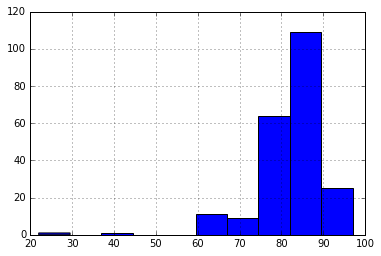

In [18]:
pd.Series(fragments).hist()

In [34]:
import os
import subprocess

In [37]:
import time

In [53]:
fns = glob.glob('/projects/CARDIPS/pipeline/ATACseq/sample/*/alignment/*_sorted_rmdup.bam')
count = 1
for fn in fns[2:]:
    dy = os.path.split(fn)[0]
    name = fn.split('/')[-3]
    sh = os.path.join(os.path.split(dy)[0], 'sh', '{}_qsort.sh'.format(name))
    out = os.path.splitext(fn)[0] + '_query_sorted.bam'
    if not os.path.exists(sh):
        lines = '#!/bin/bash\n\n'
        lines += '#$ -N job_{}_qsort\n'.format(name)
        lines += '#$ -l h_vmem=1.5G\n'
        lines += '#$ -pe smp 4\n'
        lines += '#$ -S /bin/bash\n'
        lines += '#$ -o /projects/CARDIPS/pipeline/ATACseq/sample/{0}/logs/job_{0}_qsort.out\n'.format(name)
        lines += '#$ -e /projects/CARDIPS/pipeline/ATACseq/sample/{0}/logs/job_{0}_qsort.err\n\n'.format(name)
        lines += ('# This script runs query sorting for the rmdup bam because an earlier version of the pipeline'
                  ' didn\'t have this command.\n\n')
        lines += 'module load cardips\n'
        lines += 'source activate cardips\n'
        lines += ('sambamba sort -m 4GB -t 4 -n \\\n\t--tmpdir {} \\\n\t{} \\\n\t-o {}\n'.format(dy, fn, out))
        with open(sh, 'w') as f:
            f.write(lines)
        subprocess.check_call('qsub {}'.format(sh), shell=True)
        count += 1

In [ ]:
#!/bin/bash

#$ -N job_1071bbc3-1c0c-423d-a3b8-3912d4eefa84_alignment
#$ -l h_vmem=4.0G
#$ -pe smp 8
#$ -S /bin/bash
#$ -o /projects/CARDIPS/pipeline/ATACseq/sample/1071bbc3-1c0c-423d-a3b8-3912d4eefa84/logs/job_1071bbc3-1c0c-423d-a3b8-3912d4eefa84_alignment.out
#$ -e /projects/CARDIPS/pipeline/ATACseq/sample/1071bbc3-1c0c-423d-a3b8-3912d4eefa84/logs/job_1071bbc3-1c0c-423d-a3b8-3912d4eefa84_alignment.err

# Git repository version:
# 143ac01998ad4100bdde2f3fa1ba1b9384744f6a (HEAD -> new_cluster, origin/new_cluster) Bug fix for removing duplicates

module load cardips

source activate cardips



In [29]:
c

'sambamba sort -m 4GB -t 4 -n --tmpdir /projects/CARDIPS/pipeline/ATACseq/sample/472b28d7-565a-4fbd-81d0-88aec1c67669/alignment /projects/CARDIPS/pipeline/ATACseq/sample/472b28d7-565a-4fbd-81d0-88aec1c67669/alignment/472b28d7-565a-4fbd-81d0-88aec1c67669_sorted_rmdup.bam -o /projects/CARDIPS/pipeline/ATACseq/sample/472b28d7-565a-4fbd-81d0-88aec1c67669/alignment/472b28d7-565a-4fbd-81d0-88aec1c67669_sorted_rmdup_query_sorted.bam'

In [60]:
dys = glob.glob('/projects/CARDIPS/pipeline/ATACseq/sample/*')
dys = [x for x in dys if '1071bbc3-1c0c-423d-a3b8-3912d4eefa84' not in x]
dys = [x for x in dys if 'old' not in x]
dys = [x for x in dys if 'SRR' not in x]

In [63]:
dys[0]

'/projects/CARDIPS/pipeline/ATACseq/sample/4d75c71d-a7d6-4280-9248-36ac6712ff14'

In [64]:
for dy in dys:
    !rm -r {'{}/*counts'.format(dy)}
    !rm -r {'{}/sh/*counts*'.format(dy)}
    !rm -r {'{}/logs/*counts*'.format(dy)}

^C


In [66]:
3 + #

SyntaxError: invalid syntax (<ipython-input-66-76dd9541e76f>, line 1)

In [2]:
import pandas as pd

In [16]:
df = pd.read_table('/projects/T2D/pipeline/ATACseq/combined_files/star_logs.tsv', index_col=0)

In [17]:
df[['Number of input reads', 'Uniquely mapped reads %']]

,Number of input reads,Uniquely mapped reads %
A0001_ISL_ATAC_S38,52169201,82.71
A0001_ISL_ATAC_S37,11013598,81.95
A0001_ISL_ATAC_combined,103042423,82.27
A0001_ISL_ATAC_S10,39859624,81.78


In [9]:
import glob
import os

In [18]:
df = pd.read_table('/projects/T2D/pipeline/ATACseq/combined_files/picard_metrics.tsv', index_col=0)

In [20]:
df[['MEDIAN_INSERT_SIZE', 'PERCENT_DUPLICATION']]

,MEDIAN_INSERT_SIZE,PERCENT_DUPLICATION
A0001_ISL_ATAC_S38,189,0.164157
A0001_ISL_ATAC_S37,192,0.081011
A0001_ISL_ATAC_combined,184,0.149780
A0001_ISL_ATAC_S10,175,0.114720


In [23]:
df = pd.read_table('/projects/T2D/pipeline/ATACseq/combined_files/num_peaks.tsv', index_col=0, header=None)

In [24]:
df

,1
0,
A0001_ISL_ATAC_S38,26600
A0001_ISL_ATAC_S37,11953
A0001_ISL_ATAC_combined,34784
A0001_ISL_ATAC_S10,21086


In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
fn = '/projects/CARDIPS/pipeline/Hi-C/7_indv_HiC/contact_matrices/merged/raw/iPSC/iPSC.10Kb.raw.chr1.mat'

In [6]:
f = open(fn)

In [7]:
line = f.readline()

In [9]:
vals = [float(x) for x in line.strip().split()]

In [11]:
sum(vals)

0.0

In [ ]:
df = pd.read_table(fn, low_memory=False, engine='c', dtype=np.float64, header=None)

In [ ]:
2 + 2

In [12]:
import glob

In [20]:
import os

In [21]:
len(fns)

46

In [23]:
os.path.split(fns[0])[1].split('.')

['iPSC', '5Kb', 'raw', 'chr6', 'mat']

In [51]:
dy = '/projects/CARDIPS/pipeline/Hi-C/7_indv_HiC/contact_matrices/merged/normalized/iPSC'
fns = glob.glob('{}/*'.format(dy))
fns.sort()
commands = []
d = {'5Kb':5000, '10Kb':10000}
for fn in fns:
    name = os.path.split(fn)[1].replace('.mat', '.bed.gz')
    out = os.path.join(os.path.split(fn)[0], name)
    chrom = name.split('.')[-3]
    size = d[name.split('.')[1]]
    c = 'awk \'BEGIN {{i=0}} {{print {0}"\\t"i*{1}"\\t"(i+1)*{1}"\\t"$0}} {{i++}}\' {2} | bgzip > {3}'.format(chrom, size, fn, out)
    commands.append(c)
    c = 'tabix -p bed {}'.format(out)
    commands.append(c)
with open('{}/tabix.sh'.format(dy), 'w') as f:
    f.write('\n'.join(commands) + '\n')

In [46]:
out

'/projects/CARDIPS/pipeline/Hi-C/7_indv_HiC/contact_matrices/merged/raw/iPSC/iPSC.5Kb.raw.chrX.bed.gz'

In [1]:
2 + 2

4

In [1]:
import cardipspy as cpy
import pybedtools as pbt
import pandas as pd
import cdpybio as cpb
%matplotlib inline

In [19]:
class AnnotatedBed:
    def __init__(
        self,   
        bed,
        annot_beds,
        completely_contains=None,
    ):  
        """
        Initialize AnnotatedBed object.
            
        Parameters
        ----------
        bed : str or pybedtools.Bedtool
            Bed file to annotate.
        
        annot_beds : dict
            Dict whose keys are names (like 'gene', 'promoter', etc.) and whose
            values are bed files to annotate the input bed file with.
            
        completely_contains : list
            List of keys from annot_beds. For these beds, we will check whether the 
            features is entirely contained by features "bed."
        
        """            
        self._initialize_bt(bed)
        self._num_cols = len(self.bt[0].fields)
        self._has_name_col = self._num_cols > 3
        self._initialize_dfs()
        self._initialize_annot_beds(annot_beds)
        for k in annot_beds.keys():
            self.annotate_bed(self.bt, k, k)
        for k in completely_contains:
            self.annotate_bed(self.bt, k, k, complete=True)
        self._bt_path = None
            
    def load_saved_bts(self):
        """If the AnnotatedBed object was saved to a pickle and reloaded,
        this method remakes the BedTool object."""
        if self._bt_path:
            self.bt = pbt.BedTool(self._bt_path)
            
    def save(
        self,
        path,
        name,
    ):
        """
        Save AnnotatedBed object and bed file. The object is stored in a pickle
        and the bed file is saved as a separate bed file. The object can be reloaded
        by reading the pickle using cPickle.
            
        Parameters
        ----------
        path : str
            Path to save files to. Path should include a basename for the files.
            For instance, path='~/abc' will create files like ~/abc.pickle, ~/abc.bed,
            etc.
            
        name : str
            Descriptive name used for bed file trackline.
        """
        t = 'track type=bed name="{}"'.format(name)
        self.bt.saveas(path + '.bed', trackline=t)
        self._bt_path = path + '.bed'
        import cPickle
        cPickle.dump(self, open(path + '.pickle', 'w'))
        
    def _initialize_annot_beds(
        self, 
        annot_beds,
    ):
        import pybedtools as pbt
        self.annot_beds = dict()
        for k in annot_beds.keys():
            if type(annot_beds[k]) == str:
                self.annot_beds[k] = pbt.BedTool(annot_beds[k])
            else:
                self.annot_beds[k] = annot_beds[k]

    def _initialize_dfs(
        self,
    ):  
        self.df = self.bt.to_dataframe()
        if self._has_name_col:
            if len(set(self.df.name)) != self.df.shape[0]:
                self._has_name_col = False
        if self._has_name_col:
            self.df.index = self.df.name
        else:
            self.df.index = (self.df.chrom.astype + ':' + self.df.start.astype(str) + 
                             + '-' + self.df.end.astype(str))
        self.feature_to_df = pd.DataFrame(index=self.df.index)

    def _initialize_bt(
        self,
        bed,           
    ):                 
        import pybedtools as pbt
        if type(bed) == str:
            self.bt = pbt.BedTool(bed)
        else:
            self.bt = bed
        self.bt = self.bt.sort()
        
    def bt_from_df(self):
        """Make a BedTool object for the input bed file."""
        import pybedtools as pbt
        s = '\n'.join(df.astype(str).apply(lambda x: '\t'.join(x), axis=1)) + '\n'
        df.bt = pbt.BedTool(s, from_string=True)
        
    def annotate_bed(
        self,
        bt,
        name,
        col_name,
        complete=None,
    ):
        """name is the key for the bed file in self.annot_beds. col_name is used to name 
        the columns created in the dataframe."""
        import numpy as np
        import pandas as pd
        has_name_col = len(self.annot_beds[name][0].fields) > 3
        if complete:
            res = bt.intersect(self.annot_beds[name], sorted=True, wo=True, F=1)
            col_name = col_name + '_complete'
        else:
            res = bt.intersect(self.annot_beds[name], sorted=True, wo=True)
        df = res.to_dataframe(names=range(len(res[0].fields)))
        if self._has_name_col:
            ind = df[3].values
        else:
            ind = list(df[0].astype(str) + ':' +
                       df[1].astype(str) + '-' +
                       df[2].astype(str))
        if has_name_col:
            vals = df[self._num_cols + 3].values
        else:
            vals = list(df[self._num_cols + 0].astype(str) + ':' +
                        df[self._num_cols + 1].astype(str) + '-' +
                        df[self._num_cols + 2].astype(str))
        self.df[col_name] = False
        self.df.ix[set(ind), col_name] = True
        se = pd.Series(vals, index=ind)
        vc = pd.Series(se.index).value_counts()
        self.feature_to_df[col_name] = np.nan
        self.feature_to_df.ix[list(vc[vc == 1].index), col_name] = se[list(vc[vc == 1].index)].apply(lambda x: set([x]))
        m = list(set(vc[vc > 1].index))
        v = []
        for i in m:
            v.append(set(se[i].values))
        self.feature_to_df.ix[m, col_name] = v
        
class AnnotatedInteractions(AnnotatedBed):
    def __init__(
        self,   
        df,
        annot_beds,
        completely_contains=None,
    ):  
        """
        Initialize AnnotatedBed object.
            
        Parameters
        ----------
        df : pandas.DataFrame
            Dataframe with peaks. Must contain columns chrom1, start1, end1, chrom2,
            start2, end2 and have unique index.
        
        annot_beds : dict
            Dict whose keys are names (like 'gene', 'promoter', etc.) and whose
            values are bed files to annotate the input bed file with.
        
        """            
        self.df = df.copy(deep=True)
        self.df['name'] = self.df.index
        self.feature_to_df = pd.DataFrame(index=self.df.index)
        self.annotate_interactions()
        self.bt_from_df()
        self._initialize_annot_beds(annot_beds)
        suffixes = ['1', '2', '_loop', '_loop_inner']
        for i,bt in enumerate([self.bt1, self.bt2, self.bt_loop, self.bt_loop_inner]):
            for k in annot_beds.keys():
                self.annotate_bed(bt, k, '{}{}'.format(k, suffixes[i]))
        for i,bt in enumerate([self.bt1, self.bt2, self.bt_loop, self.bt_loop_inner]):
            for k in completely_contains:
                self.annotate_bed(bt, k, '{}{}'.format(k, suffixes[i]), complete=True)
        self._bt1_path = None
        self._bt2_path = None
        self._bt_loop_path = None
        self._bt_loop_inner_path = None

    def load_saved_bts(self):
        """If the AnnotatedInteractions object was saved to a pickle and reloaded,
        this method remakes the BedTool objects."""
        if self._bt1_path:
            self.bt1 = pbt.BedTool(self._bt1_path)
        if self._bt2_path:
            self.bt2 = pbt.BedTool(self._bt2_path)
        if self._bt_loop_path:
            self.bt_loop = pbt.BedTool(self._bt_loop_path)
        if self._bt_loop_inner_path:
            self.bt_loop_inner = pbt.BedTool(self._bt_loop_inner_path)
        
    def save(
        self,
        path,
        name,
    ):
        """
        Save AnnotatedInteractions object and bed files. The object is stored in a pickle
        and the bed files are saved as separate bed files. The object can be reloaded
        by reading the pickle using cPickle and the BedTool objects can be recreated using
        .load_saved_bts().
            
        Parameters
        ----------
        path : str
            Path to save files to. Path should include a basename for the files.
            For instance, path='~/abc' will create files like ~/abc.pickle, ~/abc_anchor1.bed,
            etc.
            
        name : str
            Descriptive name used for bed file trackline.
        """
        t = 'track type=bed name="{}_anchor1"'.format(name)
        self.bt1.saveas(path + '_anchor1.bed', trackline=t)
        self._bt1_path = path + '_anchor1.bed'
        t = 'track type=bed name="{}_anchor2"'.format(name)
        self.bt2.saveas(path + '_anchor2.bed', trackline=t)
        self._bt2_path = path + '_anchor2.bed'
        t = 'track type=bed name="{}_loop"'.format(name)
        self.bt_loop.saveas(path + '_loop.bed', trackline=t)
        self._bt_loop_path = path + '_loop.bed'
        t = 'track type=bed name="{}_loop_inner"'.format(name)
        self.bt_loop_inner.saveas(path + '_loop_inner.bed', trackline=t)
        self._bt_loop_inner_path = path + '_loop_inner.bed'
        import cPickle
        cPickle.dump(self, open(path + '.pickle', 'w'))   
    
    def annotate_bed(
        self,
        bt,
        name,
        col_name,
        complete=None,
    ):
        """name is the key for the bed file in self.annot_beds. col_name is used to name 
        the columns created in the dataframe."""
        import numpy as np
        import pandas as pd
        has_name_col = len(self.annot_beds[name][0].fields) > 3
        if complete:
            res = bt.intersect(self.annot_beds[name], sorted=True, wo=True, F=1)
            col_name = col_name + '_complete'
        else:
            res = bt.intersect(self.annot_beds[name], sorted=True, wo=True)
        try:
            df = res.to_dataframe(names=range(len(res[0].fields)))
            ind = df[3].values
            if has_name_col:
                vals = df[7].values
            else:
                vals = list(df[4].astype(str) + ':' +
                            df[5].astype(str) + '-' +
                            df[6].astype(str))
            self.df[col_name] = False
            self.df.ix[set(ind), col_name] = True
            se = pd.Series(vals, index=ind)
            vc = pd.Series(se.index).value_counts()
            self.feature_to_df[col_name] = np.nan
            self.feature_to_df.ix[list(vc[vc == 1].index), col_name] = se[list(vc[vc == 1].index)].apply(lambda x: set([x]))
            m = list(set(vc[vc > 1].index))
            v = []
            for i in m:
                v.append(set(se[i].values))
            self.feature_to_df.ix[m, col_name] = v
        except IndexError:
            pass
        
    def annotate_interactions(self):
        import numpy as np
        self.df['anchor1'] = (self.df.chrom1.astype(str) + ':' + self.df.start1.astype(str) + 
                              '-' + self.df.end1.astype(str))
        self.df['anchor2'] = (self.df.chrom2.astype(str) + ':' + self.df.start2.astype(str) + 
                              '-' + self.df.end2.astype(str))
        self.df['intra'] = True
        self.df.ix[self.df.chrom1 != self.df.chrom2, 'intra'] = False
        ind = self.df[self.df.intra].index
        self.df['loop'] = np.nan
        self.df.ix[ind, 'loop'] = (self.df.chrom1 + ':' + self.df[['start1', 'start2']].min(axis=1).astype(str) + 
                                   '-' + self.df[['end1', 'end2']].max(axis=1).astype(str))
        self.df['loop_inner'] = np.nan
        self.df.ix[ind, 'loop_inner'] = (self.df.chrom1 + ':' + self.df[['end1', 'end2']].min(axis=1).astype(str) + 
                                         '-' + self.df[['start1', 'start2']].max(axis=1).astype(str))
        self.df['loop_length'] = (self.df[['end1', 'end2']].max(axis=1) - 
                                  self.df[['start1', 'start2']].min(axis=1))
        self.df['loop_inner_length'] = (self.df[['start1', 'start2']].max(axis=1) - 
                                        self.df[['end1', 'end2']].min(axis=1))
        
    def bt_from_df(self):         
        import pybedtools as pbt
        s = '\n'.join(list(set(self.df.chrom1.astype(str) + '\t' + self.df.start1.astype(str) + 
                               '\t' + self.df.end1.astype(str) + '\t' + self.df.name))) + '\n'
        self.bt1 = pbt.BedTool(s, from_string=True).sort()
        s = '\n'.join(list(set(self.df.chrom2.astype(str) + '\t' + self.df.start2.astype(str) + 
                               '\t' + self.df.end2.astype(str) + '\t' + self.df.name))) + '\n'
        self.bt2 = pbt.BedTool(s, from_string=True).sort()
        s = '\n'.join(self.df.chrom1.astype(str) + '\t' + self.df[['start1', 'start2']].min(axis=1).astype(str) + 
             '\t' + self.df[['end1', 'end2']].max(axis=1).astype(str) + '\t' + self.df.name) + '\n'
        self.bt_loop = pbt.BedTool(s, from_string=True).sort()
        s = '\n'.join(self.df.chrom1.astype(str) + '\t' + self.df[['end1', 'end2']].min(axis=1).astype(str) + 
             '\t' + self.df[['start1', 'start2']].max(axis=1).astype(str)  + '\t' + self.df.name) + '\n'
        self.bt_loop_inner = pbt.BedTool(s, from_string=True).sort()

In [3]:
# HeLa_RNAPII
# http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1872889
url = ('http://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM1872889&format=file&file='
       'GSM1872889%5FHeLa%5FRNAPII%5FPET%5Fclusters%2Etxt%2Egz')
s = cpb.general.read_gzipped_text_url(url)
lines = [x.split() for x in s.strip().split('\n')]

In [4]:
df = pd.DataFrame(lines, columns=['chrom1', 'start1', 'end1', 
                                  'chrom2', 'start2', 'end2', 'freq'])
df.index = df.chrom1 + ':' + df.start1 + '-' + df.end1 + '==' + df.chrom2 + ':' + df.start1 + '-' + df.end2
for c in ['start1', 'start2', 'end1', 'end2', 'freq']:
    df[c] = df[c].astype(int)

In [5]:
d = {'gene':pbt.BedTool(cpy.gencode_gene_bed), 'tss':pbt.BedTool(cpy.gencode_tss_bed)}#, 'exon':exon}

In [20]:
ai = AnnotatedInteractions(df.head(100), d, completely_contains=['gene'])

In [21]:
ai.save('/frazer01/projects/CARDIPS/analysis/cardips-ipsc-eqtl/sandbox/savetest', 'inter_test')

In [13]:
import cPickle

In [14]:
aii = cPickle.load(open('/frazer01/projects/CARDIPS/analysis/cardips-ipsc-eqtl/sandbox/savetest.pickle'))

In [15]:
aii.load_saved_bts()

In [1]:
3 + 3

6

In [6]:
fn = '/projects/CARDIPS/analysis/cardips-ipsc-eqtl/output/cnv_processing/cnvs.bed'
cnv_bt = pbt.BedTool(fn)

In [3]:
exon = pbt.BedTool(cpy.gencode_exon_bed)

In [4]:
d = {'gene':cpy.gencode_gene_bed, 'tss':cpy.gencode_tss_bed, 'exon':exon}

In [19]:
ab = AnnotatedBed(cnv_bt, d, completely_contains=['gene'])

In [20]:
ab.df.head()

,chrom,start,end,name,gene,exon,tss,gene_complete
name,,,,,,,,
CNV_1_55176_56686,chr1,55176,56686,CNV_1_55176_56686,False,False,False,False
CNV_1_85392_86406,chr1,85392,86406,CNV_1_85392_86406,False,False,False,False
CNV_1_86407_91299,chr1,86407,91299,CNV_1_86407_91299,True,True,True,True
CNV_1_562952_567683,chr1,562952,567683,CNV_1_562952_567683,True,True,True,True
CNV_1_565576_567883,chr1,565576,567883,CNV_1_565576_567883,True,True,True,False


In [21]:
ab.save('/frazer01/projects/CARDIPS/analysis/cardips-ipsc-eqtl/sandbox/savetest')

In [23]:
se = ab.feature_to['gene'].copy(deep=True)

In [31]:
se.ix['CNV_1_746778_748786']

'ENSG00000240453.1'

In [30]:
abb = cPickle.load(open('/frazer01/projects/CARDIPS/analysis/cardips-ipsc-eqtl/sandbox/savetest.pickle'))

In [32]:
abb.load_saved_bt()

In [33]:
abb.bt.fn

'/frazer01/projects/CARDIPS/analysis/cardips-ipsc-eqtl/sandbox/savetest.bed'

In [25]:
abb.bt.head()

chr1	55176	56686	CNV_1_55176_56686
 chr1	85392	86406	CNV_1_85392_86406
 chr1	86407	91299	CNV_1_86407_91299
 chr1	562952	567683	CNV_1_562952_567683
 chr1	565576	567883	CNV_1_565576_567883
 chr1	565853	567683	CNV_1_565853_567683
 chr1	712526	731595	CNV_1_712526_731595
 chr1	746778	748786	CNV_1_746778_748786
 chr1	755023	757122	CNV_1_755023_757122
 chr1	755423	757622	CNV_1_755423_757622
 

In [37]:
se.head()

CNV_1_86407_91299      ENSG00000238009.2
CNV_1_86407_91299      ENSG00000239945.1
CNV_1_562952_567683    ENSG00000230021.3
CNV_1_562952_567683    ENSG00000223659.1
CNV_1_562952_567683    ENSG00000225972.1
dtype: object

In [33]:
# Working here. Instead of making series, make one df with entries for eacht thing.
# Need to parse series to get list per index value.
vc = pd.Series(se.index).value_counts()

In [36]:
vc.tail()

CNV_6_167584197_167587542    1
CNV_13_51590387_51592036     1
CNV_8_52885509_52889639      1
CNV_13_36653642_36654841     1
CNV_13_46720727_46722591     1
dtype: int64

In [ ]:
vc

[{'ENSG00000234068.2', 'ENSG00000238269.4'},
 {'ENSG00000133661.11', 'ENSG00000242600.2'},
 {'ENSG00000227082.1', 'ENSG00000230806.1', 'ENSG00000231429.2'},
 {'ENSG00000183454.9', 'ENSG00000266439.1'},
 {'ENSG00000213240.7', 'ENSG00000255168.1'},
 {'ENSG00000226423.1', 'ENSG00000233806.3'},
 {'ENSG00000100197.16', 'ENSG00000237037.5'},
 {'ENSG00000102445.14', 'ENSG00000241353.2'},
 {'ENSG00000260846.2', 'ENSG00000261486.1'},
 {'ENSG00000155252.12', 'ENSG00000249967.1'},
 {'ENSG00000134545.9', 'ENSG00000205809.5'},
 {'ENSG00000268119.1', 'ENSG00000269237.1'},
 {'ENSG00000143786.3', 'ENSG00000229991.1'},
 {'ENSG00000188818.8', 'ENSG00000206077.6'},
 {'ENSG00000121621.6', 'ENSG00000207874.1'},
 {'ENSG00000099866.10', 'ENSG00000266933.1'},
 {'ENSG00000058453.12', 'ENSG00000186715.6'},
 {'ENSG00000163386.16', 'ENSG00000213240.7', 'ENSG00000255168.1'},
 {'ENSG00000223495.2', 'ENSG00000231448.1', 'ENSG00000235887.2'},
 {'ENSG00000117395.6', 'ENSG00000243710.3'},
 {'ENSG00000163331.6', 'ENSG00